# Splitting the data into train, validate, and test

In [1]:
seedN = 42

In [3]:
!pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00a 0:00:010m


In [5]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 552.6 kB/s eta 0:00:00 0:00:01
  Obtaining depen

In [2]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

2.15.0
2.15.0


In [3]:
# import required libraries
import os
import random
import numpy as np
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model , load_model
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import layers


# Set the seed value
random.seed(seedN) 
np.random.seed(seedN)
tf.random.set_seed(seedN)

In [4]:
# Classes list
List_of_classes=[]
def print_files_in_folder(folder_path):
    files = os.listdir(folder_path)
    for file in files:
        if file != '.DS_Store':
            List_of_classes.append(file)
    return List_of_classes

folder_path = '/Users/mashaelalmus/Desktop/cleaning_dataset_file/output'
print_files_in_folder(folder_path)

['electrical_output',
 'out_physical',
 'weather_output',
 'clean_output',
 'snow_output']

In [5]:
len(List_of_classes)

5

In [6]:
# Define the paths for tra, validate, and test sets
train_path = '/Users/mashaelalmus/Desktop/cleaning_dataset_file/train'
val_path   = '/Users/mashaelalmus/Desktop/cleaning_dataset_file/validation'
test_path  = '/Users/mashaelalmus/Desktop/cleaning_dataset_file/test'

In [7]:
# Create the output directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [8]:
dataset_path = "/Users/mashaelalmus/Desktop/cleaning_dataset_file/output"
classes_path = []

# Creating the path for each class
for Class in List_of_classes:
    classes_path.append(dataset_path+'/'+Class)

classes_path

['/Users/mashaelalmus/Desktop/cleaning_dataset_file/output/electrical_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/output/out_physical',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/output/weather_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/output/clean_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/output/snow_output']

In [9]:
# Creating paths for each class in the train, validate, and test sets

train_classes = []
validate_classes = []
test_classes = []

for Class in List_of_classes:
    train_classes.append(train_path+'/'+Class)
    validate_classes.append(val_path+'/'+Class)
    test_classes.append(test_path+'/'+Class)


In [10]:
train_classes

['/Users/mashaelalmus/Desktop/cleaning_dataset_file/train/electrical_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/train/out_physical',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/train/weather_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/train/clean_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/train/snow_output']

In [11]:
validate_classes

['/Users/mashaelalmus/Desktop/cleaning_dataset_file/validation/electrical_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/validation/out_physical',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/validation/weather_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/validation/clean_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/validation/snow_output']

In [12]:
test_classes

['/Users/mashaelalmus/Desktop/cleaning_dataset_file/test/electrical_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/test/out_physical',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/test/weather_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/test/clean_output',
 '/Users/mashaelalmus/Desktop/cleaning_dataset_file/test/snow_output']

In [13]:
for i in range(len(List_of_classes)):
    os.makedirs(train_classes[i], exist_ok=True)
    os.makedirs(validate_classes[i], exist_ok=True)
    os.makedirs(test_classes[i], exist_ok=True)

In [14]:
classes = ['electrical_output',
 'out_physical',
 'weather_output',
 'clean_output',
 'snow_output']#'Leaves',

# Set your base paths
base_path = '/Users/mashaelalmus/Desktop/cleaning_dataset_file'

# Iterate through each class
for class_name in classes:
    
    #class_path = os.path.join(base_path, class_name)
    class_path = folder_path + '/' + class_name
    
    # Get the list of files in the current class
    class_files = os.listdir(class_path)
    
    # Split the files into train, validation, and test sets
    train_files, test_val_files = train_test_split(class_files, train_size=0.8, random_state=42)
    val_files, test_files = train_test_split(test_val_files, train_size=0.5, random_state=42)
    
    # Define paths for train, validation, and test folders
    train_path = os.path.join(base_path, 'train', class_name)
    val_path = os.path.join(base_path, 'validation', class_name)
    test_path = os.path.join(base_path, 'test', class_name)
    
    # Create train, validation, and test folders if they don't exist
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)
    
    # Copy files to their respective folders
    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(train_path, file)
        shutil.copy(src, dst)

    for file in val_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(val_path, file)
        shutil.copy(src, dst)

    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(test_path, file)
        shutil.copy(src, dst)


# Start running the code after splitting the data

In [4]:
List_of_classes = ['electrical_output',
 'out_physical',
 'weather_output',
 'clean_output',
 'snow_output']

In [15]:
print("Train Data:")
for Class in List_of_classes:
    print("\t "+ Class+" : " , len(os.listdir('/Users/mashaelalmus/Desktop/cleaning_dataset_file/train/'+Class)))

print("\nValidate Data:")
for Class in List_of_classes:
    print("\t "+ Class+" : " , len(os.listdir('/Users/mashaelalmus/Desktop/cleaning_dataset_file/validation/'+Class)))
    
print("\nTest Data:")
for Class in List_of_classes:
    print("\t "+ Class+" : " , len(os.listdir('/Users/mashaelalmus/Desktop/cleaning_dataset_file/test/'+Class)))

Train Data:
	 electrical_output :  111
	 out_physical :  126
	 weather_output :  195
	 clean_output :  238
	 snow_output :  82

Validate Data:
	 electrical_output :  14
	 out_physical :  16
	 weather_output :  24
	 clean_output :  30
	 snow_output :  10

Test Data:
	 electrical_output :  14
	 out_physical :  16
	 weather_output :  25
	 clean_output :  30
	 snow_output :  11


# 
# Preprocessing The Images

In [16]:
# Data preprocessing for train, validation, and test datasets

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.3,
                                   zoom_range=0.5, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=45, 
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   brightness_range=[0.2,1.2])

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_directory = '/Users/mashaelalmus/Desktop/cleaning_dataset_file/train'
val_directory   = '/Users/mashaelalmus/Desktop/cleaning_dataset_file/validation'
test_directory  = '/Users/mashaelalmus/Desktop/cleaning_dataset_file/test'

In [18]:
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    color_mode = "rgb",
    shuffle=True,
    seed = seedN)

val_generator = val_datagen.flow_from_directory(
    val_directory,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    color_mode  ="rgb",
    shuffle=True,
    seed = seedN)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    color_mode  ="rgb",
    shuffle=True,
    seed = seedN)

Found 750 images belonging to 5 classes.
Found 94 images belonging to 5 classes.
Found 96 images belonging to 5 classes.


In [19]:
# Assuming you have the generators as described in your code

# Print total number of images after augmentation for the training set
total_train_images = train_generator.samples
print(f"Total number of training images after augmentation: {total_train_images}")

# Print total number of images after augmentation for the validation set
total_val_images = val_generator.samples
print(f"Total number of validation images after augmentation: {total_val_images}")

# Print total number of images after augmentation for the test set
total_test_images = test_generator.samples
print(f"Total number of test images after augmentation: {total_test_images}")


Total number of training images after augmentation: 750
Total number of validation images after augmentation: 94
Total number of test images after augmentation: 96


In [20]:
# Check the class indices
print(train_generator.class_indices)

{'clean_output': 0, 'electrical_output': 1, 'out_physical': 2, 'snow_output': 3, 'weather_output': 4}


# 
# Metrics

In [21]:
from tensorflow.keras import metrics as Metrics

Prec = Metrics.Precision()
Rec  = Metrics.Recall()
Acc  = Metrics.Accuracy()

mList = ['accuracy', Prec, Rec]

# 
# Modeling

# MobileNet

In [45]:
from keras.applications import MobileNet

MobileNet_model = MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False , pooling='avg')

for layer in MobileNet_model.layers:
    layer.trainable = True


model_mobilenet = Flatten()(MobileNet_model.output)
model_mobilenet = layers.Dropout(0.0001)(model_mobilenet)
model_mobilenet = Dense(256, activation='relu')(model_mobilenet)
model_mobilenet = Dense(128, activation='relu')(model_mobilenet)
model_mobilenet = Dense(64, activation='relu')(model_mobilenet)
model_mobilenet = Dense(32, activation='relu')(model_mobilenet)
model_mobilenet = Dense(16, activation='relu')(model_mobilenet)
#model_mobilenet = Dense(10, activation='relu')(model_mobilenet)
#model_mobilenet = layers.Dropout(0.0001)(model_mobilenet)
model_mobilenet = Dense(5, activation='softmax')(model_mobilenet)

model_mobilenet = Model(inputs=MobileNet_model.input, outputs=model_mobilenet)

model_mobilenet.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=mList)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stoppingMN = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpointMN = ModelCheckpoint('MobileNet_model.h5', monitor='val_loss', save_best_only=True)

In [47]:
mobNet_model =  model_mobilenet.fit(train_generator, 
                                      steps_per_epoch=len(train_generator), 
                                      epochs=100,
                                      batch_size=64,
                                      validation_data=val_generator, 
                                      validation_steps=len(val_generator),
                                      callbacks=[early_stoppingMN, model_checkpointMN]
                                     )

Epoch 1/100
24/24 [==============================] - 30s 1s/step - loss: 1.5549 - accuracy: 0.3427 - precision: 0.8542 - recall: 0.0969 - val_loss: 1.6062 - val_accuracy: 0.3191 - val_precision: 0.4043 - val_recall: 0.2021
Epoch 2/100
24/24 [==============================] - 26s 1s/step - loss: 1.3202 - accuracy: 0.4680 - precision: 0.7126 - recall: 0.1653 - val_loss: 1.3054 - val_accuracy: 0.5213 - val_precision: 0.5714 - val_recall: 0.2979
Epoch 3/100
24/24 [==============================] - 26s 1s/step - loss: 1.0941 - accuracy: 0.5880 - precision: 0.7970 - recall: 0.3560 - val_loss: 1.4096 - val_accuracy: 0.5851 - val_precision: 0.5802 - val_recall: 0.5000
Epoch 4/100
24/24 [==============================] - 25s 1s/step - loss: 0.8262 - accuracy: 0.7067 - precision: 0.8253 - recall: 0.5480 - val_loss: 0.8629 - val_accuracy: 0.7234 - val_precision: 0.7471 - val_recall: 0.6915
Epoch 5/100
24/24 [==============================] - 25s 1s/step - loss: 0.6895 - accuracy: 0.7653 - precisi

In [48]:
Mob_score = model_mobilenet.evaluate(test_generator)

print('MobileNet Test loss:', Mob_score[0])
print('MobileNet Test accuracy:', Mob_score[1])
print('MobileNet Test precision:', Mob_score[2])
print('MobileNet Test recall:', Mob_score[3])

3/3 [==============================] - 1s 335ms/step - loss: 0.3935 - accuracy: 0.9167 - precision: 0.9263 - recall: 0.9167
MobileNet Test loss: 0.3935047388076782
MobileNet Test accuracy: 0.9166666865348816
MobileNet Test precision: 0.9263157844543457
MobileNet Test recall: 0.9166666865348816


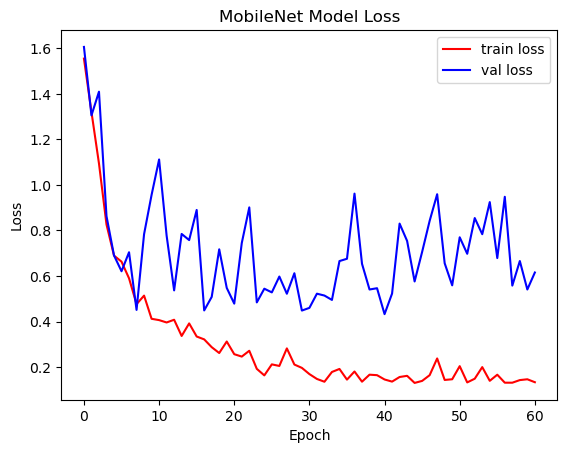

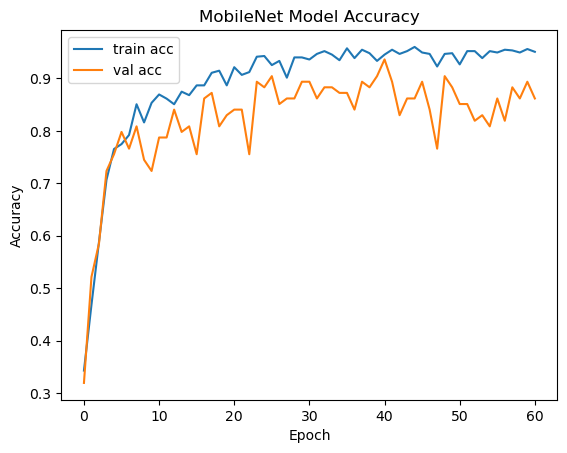

In [49]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(mobNet_model.history['loss'], label='train loss', color="red")
plt.plot(mobNet_model.history['val_loss'], label='val loss', color="blue")
plt.title('MobileNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(mobNet_model.history['accuracy'], label='train acc')
plt.plot(mobNet_model.history['val_accuracy'], label='val acc')
plt.title('MobileNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()